In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dsata Set for Assignment 1.csv')

In [3]:
df['diagnosis'] = df['diagnosis'].replace('B', 0)
df['diagnosis'] = df['diagnosis'].replace('M', 1)

# Feature Engineering Task 1:

In [4]:
#We first need to undersatand the number of missing values in each column
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                1
texture_mean               0
perimeter_mean             1
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             1
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 2
smoothness_worst           0
compactness_worst          0
concavity_worst            1
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
#The NULL values are only present in continuous numerical values, so we fill it with the mean of exsisting values in the column
df_new=df
df_new['radius_mean'] = df_new['radius_mean'].replace(np.NaN, df_new['radius_mean'].mean())
df_new['perimeter_mean'] = df_new['perimeter_mean'].replace(np.NaN, df_new['perimeter_mean'].mean())
df_new['concavity_mean'] = df_new['concavity_mean'].replace(np.NaN, df_new['concavity_mean'].mean())
df_new['compactness_se'] = df_new['compactness_se'].replace(np.NaN, df_new['compactness_se'].mean())
df_new['area_worst'] = df_new['area_worst'].replace(np.NaN, df_new['area_worst'].mean())
df_new['concavity_worst'] = df_new['concavity_worst'].replace(np.NaN, df_new['concavity_worst'].mean())

In [6]:
# We have successfully added the missing values
df_new.isnull().sum().sum()

0

# Feature Engineering Task 2

In [7]:
# Normalizing all the features and saving it in a new DataFrame
normalized_df=df_new
normalized_df.iloc[:,2:]=df_new.iloc[:,2:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [8]:
# The Normalized DataSet is shown below
normalized_df.head

<bound method NDFrame.head of            id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1     1.102422     -2.071512        1.268389   
1      842517          1     1.836635     -0.353322        1.684639   
2    84300903          1     1.586206      0.455786        1.565122   
3    84348301          1    -0.767260      0.253509       -0.595257   
4    84358402          1     1.756953     -1.150804        1.775308   
..        ...        ...          ...           ...             ...   
564    926424          1     2.118368      0.720838        2.059677   
565    926682          1     1.711420      2.083301        1.614577   
566    926954          1     0.706858      2.043775        0.670803   
567    927241          1     1.845172      2.334403        1.981372   
568     92751          0    -1.808817      1.220718       -1.817631   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0     0.983510         1.567087          3.28062

### Removing rows that contain NuLL values 

In [9]:
df.dropna(inplace=True)

### Training- Testing Split (Initial DataFrame)

In [10]:
df = np.asarray(df)
np.random.shuffle(df[0:568])

In [11]:
x = df[:, 2:]
y = df[:, 1]

In [12]:
x_train,x_test = np.split(x,[int(0.67 * len(df))])

print(f"No. of training examples: {x_train.shape}")
print(f"No. of testing examples: {x_test.shape}")

No. of training examples: (381, 30)
No. of testing examples: (188, 30)


In [13]:
y_train,y_test = np.split(y,[int(0.67 * len(df))])

print(f"No. of training examples: {y_train.shape}")
print(f"No. of testing examples: {y_test.shape}")

No. of training examples: (381,)
No. of testing examples: (188,)


### Training- Testing Split (Normalized DataFrame)


In [14]:
normalized_df = np.asarray(normalized_df)
np.random.shuffle(normalized_df[0:568])

In [15]:
x_norm = df[:, 2:]
y_norm = df[:, 1]

In [16]:
x_train_norm,x_test_norm = np.split(x_norm,[int(0.67 * len(df))])

print(f"No. of training examples: {x_train_norm.shape}")
print(f"No. of testing examples: {x_test_norm.shape}")

No. of training examples: (381, 30)
No. of testing examples: (188, 30)


In [17]:
y_train_norm,y_test_norm = np.split(y_norm,[int(0.67 * len(df))])

print(f"No. of training examples: {y_train_norm.shape}")
print(f"No. of testing examples: {y_test_norm.shape}")

No. of training examples: (381,)
No. of testing examples: (188,)


# Part A - Perceptron Learning Algorithm:

In [18]:
    def _unit_step_func(x):
        return np.where(x >= 0, 1, 0)

In [19]:
    def fit(X, y, z, a):
        n_samples, n_features = X.shape
        
        weights = np.zeros(n_features)
        bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, weights) + bias
                y_predicted = _unit_step_func(linear_output)

                # Perceptron update rule
                update = learning_rate * (y_[idx] - y_predicted)

                weights += update * x_i
                bias += update

        linear_output = np.dot(z, weights) + bias
        y_predicted = _unit_step_func(linear_output)
        accuracy = np.sum(a == y_predicted) / len(a)
        
        return weights, bias, accuracy
    

In [20]:
def plot(X_train, weights, bias):
	fig = plt.figure()
	ax = fig.add_subplot(1, 1, 1)
	plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

	x0_1 = np.amin(X_train[:, 0])
	x0_2 = np.amax(X_train[:, 0])

	x1_1 = (-weights[0] * x0_1 - bias) / weights[1]
	x1_2 = (-weights[0] * x0_2 - bias) / weights[1]

	ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

	ymin = np.amin(X_train[:, 1])
	ymax = np.amax(X_train[:, 1])
	ax.set_ylim([ymin - 3, ymax + 3])

	plt.show()

## PM1

In [21]:
x_train_PM1 = x_train
y_train_PM1 = y_train
x_test_PM1 = x_test
y_test_PM1 = y_test

In [22]:
learning_rate=0.01
n_iters=100
weights, bias, predictions = fit(x_train_PM1, y_train_PM1, x_test_PM1, y_test_PM1)
print("Perceptron classification accuracy:", predictions)    


Perceptron classification accuracy: 0.9521276595744681


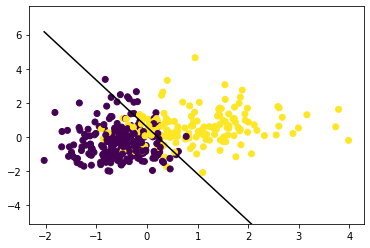

In [23]:
plot(x_train_PM1, weights, bias)

## PM2

In [24]:
df_array = np.asarray(df)
np.random.shuffle(df_array[0:568])

In [25]:
x_PM2 = df_array[:, 2:]
y_PM2 = df_array[:, 1]

In [26]:
x_train_PM2,x_test_PM2 = np.split(x_PM2,[int(0.67 * len(df))])
y_train_PM2,y_test_PM2 = np.split(y_PM2,[int(0.67 * len(df))])


In [27]:
learning_rate=0.01
n_iters=100
weights, bias, predictions = fit(x_train_PM2, y_train_PM2, x_test_PM2, y_test_PM2)
print("Perceptron classification accuracy:", predictions)    


Perceptron classification accuracy: 0.9521276595744681


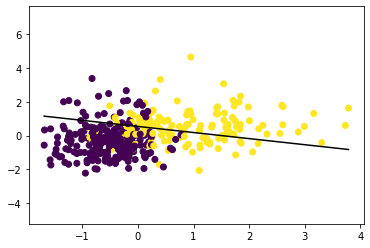

In [28]:
plot(x_train_PM2, weights, bias)

## PM3

In [29]:
x_train_PM3 = x_train_norm
y_train_PM3 = y_train_norm
x_test_PM3 = x_test_norm
y_test_PM3 = y_test_norm

In [30]:
learning_rate=0.01
n_iters=100
weights, bias, predictions = fit(x_train_PM3, y_train_PM3, x_test_PM3, y_test_PM3)
print("Perceptron classification accuracy:", predictions)    


Perceptron classification accuracy: 0.9521276595744681


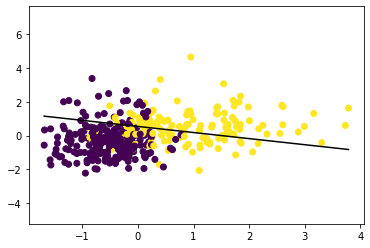

In [31]:
plot(x_train_PM1, weights, bias)

## PM4

In [32]:
#Change the order of features in the dataset randomly.

x=np.random.randint(30, size=(30))
x_train_PM2 = x_train
x_train_PM2[:, x] = x_train_PM2[:, x]
x_test_PM2 = x_test
x_test_PM2[:, x] = x_test_PM2[:, x]
y_train_PM2 = y_train
y_test_PM2 = y_test

In [33]:
learning_rate=0.01
n_iters=100
weights, bias, predictions = fit(x_train_PM2, y_train_PM2, x_test_PM2, y_test_PM2)
print("Perceptron classification accuracy:", predictions)    


Perceptron classification accuracy: 0.9521276595744681


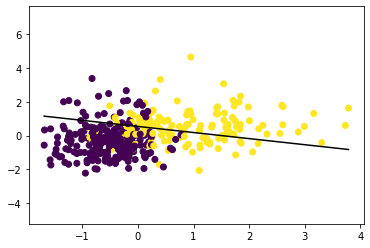

In [34]:
plot(x_train_PM1, weights, bias)

# Part B – Fisher’s Linear Discriminant Analysis:

## Learning Task 1:

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

In [36]:
x_train_lda.shape, x_test_lda.shape

((381, 1), (188, 1))

In [37]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


from sklearn.metrics import accuracy_score
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))


Accuracy 0.9202127659574468


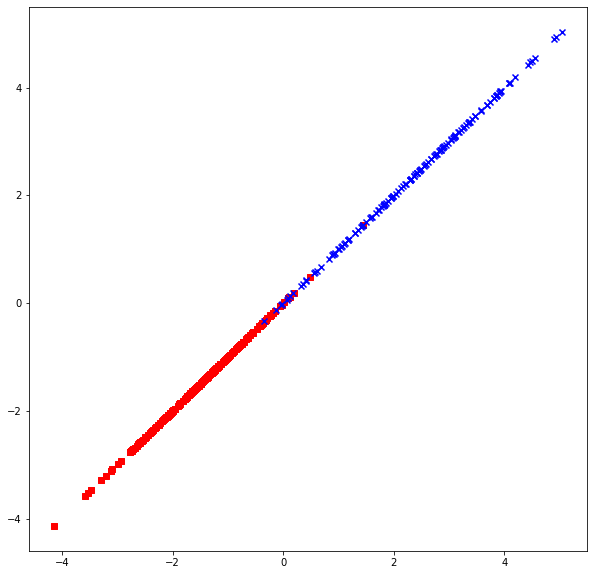

In [38]:
markers = ['s','x']
colors = ['r','b']

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(x_train_lda[:,0][y_train==l],x_train_lda[:,0][y_train==l],c=c,marker=m)
    

## Learning Task 2:

In [39]:
#Change the order of features in the dataset randomly.

x=np.random.randint(30, size=(30))
x_train_FLDM2 = x_train
x_train_FLDM2[:, x] = x_train_FLDM2[:, x]
x_test_FLDM2 = x_test
x_test_FLDM2[:, x] = x_test_FLDM2[:, x]

In [40]:
x_train_FLDM2
#Viewing the changed dataset

array([[ 1.40976685,  1.28349351,  1.49506013, ...,  2.0491249 ,
         2.85973284,  1.09926853],
       [-0.11842027, -0.3835468 , -0.17570978, ..., -0.3626255 ,
        -0.6186704 , -0.7942863 ],
       [ 0.26291506, -0.59279872,  0.27639545, ..., -0.19482378,
        -1.16984861,  0.08549692],
       ...,
       [ 0.04094375,  0.08378249,  0.23930386, ...,  0.54605961,
        -0.81263341,  1.34288377],
       [ 1.55774773, -0.26497071,  1.59397103, ...,  1.6748799 ,
         1.19973278,  0.45867118],
       [-0.73880164, -1.01362759, -0.7481566 , ..., -0.28184335,
        -0.38268208, -0.32421962]])

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train_lda_FLDM2 = lda.fit_transform(x_train_FLDM2, y_train)
x_test_lda_FLDM2 = lda.transform(x_test_FLDM2)

In [42]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


from sklearn.metrics import accuracy_score
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))


Accuracy 0.9202127659574468


In [43]:
x_train_lda_FLDM2.shape, x_test_lda_FLDM2.shape

((381, 1), (188, 1))

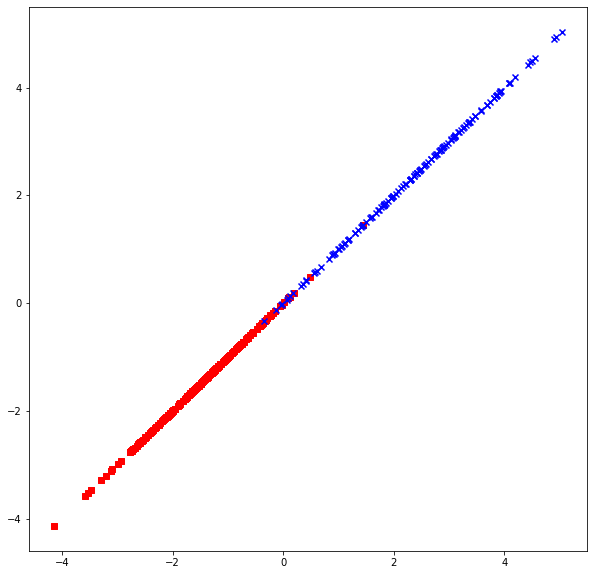

In [44]:
markers = ['s','x']
colors = ['r','b']

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(x_train_lda_FLDM2[:,0][y_train==l],x_train_lda_FLDM2[:,0][y_train==l],c=c,marker=m)
    

# Part C – Logistic Regression:

In [45]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [46]:
def model_Batch_Gradient_Descent(X, Y, learning_rate, iterations):
    
    m = X.shape[1] #Number of Features
    n = X.shape[0] #Total Samples
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Batch Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [47]:
def model_Stochastic_Gradient_Descent(X, Y, learning_rate, iterations):
    
    m = X.shape[1] #Number of Features
    n = X.shape[0] #Total Samples
    
    W = np.ones((m,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        random_index = np.random.randint(0,n-1) # random index from total samples
        sample_x = X[random_index]
        sample_x = sample_x.reshape(381, 1)
                                   
        
        Z = np.dot(W.T, sample_x) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Batch Gradient Descent
        dW = (1/m)*np.dot(A-Y, sample_x)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [48]:
def model_Mini_Batch_Gradient_Descent(X, Y, learning_rate, iterations):
    
    m = x_train_LR.shape[1]
    n = x_train_LR.shape[0]
    
    W_T = np.zeros((n,1)) 
    B_T = 0
	
    cost_list_T = []
    
    for j in range(4):
        m = x_split[j].shape[1]
        n = x_split[j].shape[0]

        W = np.zeros((n,1))
        B = 0
		
        cost_list = []

        for i in range(iterations):

            Z = np.dot(W.T, x_split[j]) + B
            A = sigmoid(Z)

            # cost function
            cost = -(1/m)*np.sum( y_split[j]*np.log(A) + (1-y_split[j])*np.log(1-A))

            # Batch Gradient Descent
            dW = (1/m)*np.dot(A-y_split, x_split[j].T)
            dB = (1/m)*np.sum(A - y_split[j])

            W = W - learning_rate*dW.T
            B = B - learning_rate*dB

            # Keeping track of our cost function value
            

            if(i%(iterations/10) == 0):
                epoch_list.append(i)
                cost_list.append(cost)
                print("cost after ", i, "iteration is : ", cost)
                
        B_T += B
        W_T += W
        cost_list_T += cost_list

    return W_T/4, B_T/4, cost_list_T/4

In [49]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
# We can alter the value of Probability Threshhold
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")


## Learning Task 1

In [50]:
x_train_LR = x_train
y_train_LR = y_train
x_test_LR = x_test
y_test_LR = y_test

In [51]:
x_train_LR = x_train_LR.T
y_train_LR = y_train_LR.reshape(1, 381)

x_test_LR = x_test_LR.T
y_test_LR = y_test_LR.reshape(1, 188)

In [52]:
print("Shape of X_train : ", x_train_LR.shape)
print("Shape of Y_train : ", y_train_LR.shape)
print("Shape of X_test : ", x_test_LR.shape)
print("Shape of Y_test : ", y_test_LR.shape)

Shape of X_train :  (30, 381)
Shape of Y_train :  (1, 381)
Shape of X_test :  (30, 188)
Shape of Y_test :  (1, 188)


### Batch Gradient Decent

In [53]:
iterations = 4000
# We can alter the value of learning_rate
learning_rate = 0.01
W, B, cost_list = model_Batch_Gradient_Descent(x_train_LR, y_train_LR, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599452
cost after  400 iteration is :  0.14127107585852494
cost after  800 iteration is :  0.11010038918047367
cost after  1200 iteration is :  0.09663747034529648
cost after  1600 iteration is :  0.08871728960656672
cost after  2000 iteration is :  0.0833387763869995
cost after  2400 iteration is :  0.07936837724033809
cost after  2800 iteration is :  0.07627311196110377
cost after  3200 iteration is :  0.07376576054560234
cost after  3600 iteration is :  nan


C:\Users\bhask\AppData\Local\Temp\ipykernel_11160\3346428379.py:17: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
C:\Users\bhask\AppData\Local\Temp\ipykernel_11160\3346428379.py:17: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))


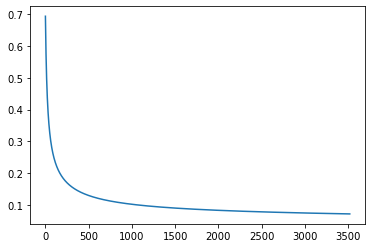

In [54]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [55]:
accuracy(x_test_LR, y_test_LR, W, B)


Accuracy of the model is :  98.4 %


#### Comparison with Sckitlearn learn

In [56]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(x_train, y_train)
predictions = logmodel.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9840425531914894

### Stochastic Gradient Descent (Not Working Properly)

In [57]:
iterations = 1000
# We can alter the value of learning_rate
learning_rate = 0.1
W, B, cost_list = model_Stochastic_Gradient_Descent(x_train_LR, y_train_LR, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  3.3326068937187925
cost after  100 iteration is :  0.6698968605174126
cost after  200 iteration is :  21.566821870374373
cost after  300 iteration is :  13.0772826503561
cost after  400 iteration is :  31.324107416601105
cost after  500 iteration is :  nan
cost after  600 iteration is :  25.369127351018086
cost after  700 iteration is :  nan
cost after  800 iteration is :  nan
cost after  900 iteration is :  83.94422653481352


C:\Users\bhask\AppData\Local\Temp\ipykernel_11160\2088371014.py:21: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
C:\Users\bhask\AppData\Local\Temp\ipykernel_11160\2088371014.py:21: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))


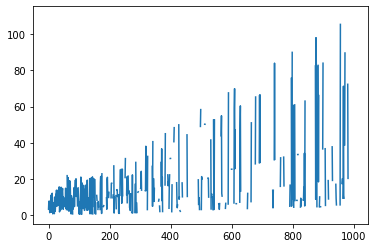

In [58]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [59]:
#accuracy(x_test_LR, y_test_LR, W, B)


ValueError: shapes (1,381) and (30,188) not aligned: 381 (dim 1) != 30 (dim 0)

### Mini Batch Gradient Descent

In [ ]:
x_split = np.array_split(x_train_LR, 4, axis=1)

y_split = np.array_split(y_train_LR, 4, axis=1)

In [ ]:
x_split[0].shape

In [ ]:
iterations = 10000
# We can alter the value of learning_rate
learning_rate = 0.01
W_T = np.zeros((x_train_LR.shape[0],1))
B_T = 0
cost_list = []
for i in range(4):
	W, B, cost_list1 = model_Batch_Gradient_Descent(x_split[0], y_split[0], learning_rate = learning_rate, iterations = iterations)
W_T += W
B_T += B
cost_list +=  cost_list1


In [ ]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [ ]:
accuracy(x_test_LR, y_test_LR, W_T/4, B_T/4)


## Learning Task 2

In [61]:
x_train_norm_LR = x_train_norm
y_train_norm_LR = y_train_norm
x_test_norm_LR = x_test_norm
y_test_norm_LR = y_test_norm

In [62]:
x_train_norm_LR = x_train_norm_LR.T
y_train_norm_LR = y_train_norm_LR.reshape(1, 381)

x_test_norm_LR = x_test_norm_LR.T
y_test_norm_LR = y_test_norm_LR.reshape(1, 188)

In [63]:
print("Shape of X_train : ", x_train_norm_LR.shape)
print("Shape of Y_train : ", y_train_norm_LR.shape)
print("Shape of X_test : ", x_test_norm_LR.shape)
print("Shape of Y_test : ", y_test_norm_LR.shape)

Shape of X_train :  (30, 381)
Shape of Y_train :  (1, 381)
Shape of X_test :  (30, 188)
Shape of Y_test :  (1, 188)


### Batch Gradient Decent


In [64]:
iterations = 4000
# We can alter the value of learning_rate
learning_rate = 0.01
W, B, cost_list = model_Batch_Gradient_Descent(x_train_norm_LR, y_train_norm_LR, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599452
cost after  400 iteration is :  0.14127107585852494
cost after  800 iteration is :  0.11010038918047367
cost after  1200 iteration is :  0.09663747034529648
cost after  1600 iteration is :  0.08871728960656672
cost after  2000 iteration is :  0.0833387763869995
cost after  2400 iteration is :  0.07936837724033809
cost after  2800 iteration is :  0.07627311196110377
cost after  3200 iteration is :  0.07376576054560234
cost after  3600 iteration is :  nan


C:\Users\bhask\AppData\Local\Temp\ipykernel_11160\3346428379.py:17: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
C:\Users\bhask\AppData\Local\Temp\ipykernel_11160\3346428379.py:17: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))


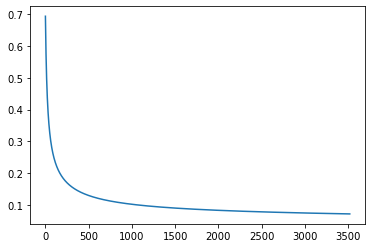

In [65]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [66]:
accuracy(x_test_norm_LR, y_test_norm_LR, W, B)


Accuracy of the model is :  98.4 %


### Comparison with Sckitlearn learn

In [67]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(x_train_norm, y_train_norm)
predictions = logmodel.predict(x_test_norm)

from sklearn.metrics import accuracy_score
accuracy_score(y_test_norm,predictions)

0.9840425531914894

### Stochastic Gradient Descent (Not Working Properly)

In [68]:
iterations = 10000
# We can alter the value of learning_rate
learning_rate = 0.01
W, B, cost_list = model_Stochastic_Gradient_Descent(x_train_norm_LR, y_train_norm_LR, learning_rate = learning_rate, n_epochs = n_epochs, iterations = iterations)

NameError: name 'n_epochs' is not defined

ValueError: x and y must have same first dimension, but have shapes (10000,) and (4000,)

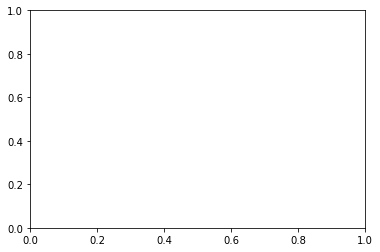

In [69]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [ ]:
accuracy(x_test_norm_LR, y_test_norm_LR, W, B)


### Mini Batch Gradient Descent

In [ ]:
x_split = np.array_split(x_train_norm_LR, 4, axis=1)

y_split = np.array_split(y_train_norm_LR, 4, axis=1)

In [ ]:
x_split[0].shape

In [ ]:
iterations = 10000
# We can alter the value of learning_rate
learning_rate = 0.01
W_T = np.zeros((x_train_norm_LR.shape[0],1))
B_T = 0
cost_list = []
for i in range(4):
	W, B, cost_list1 = model_Batch_Gradient_Descent(x_split[0], y_split[0], learning_rate = learning_rate, iterations = iterations)
W_T += W
B_T += B
cost_list +=  cost_list1


In [ ]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [ ]:
accuracy(x_test_norm_LR, y_test_norm_LR, W_T/4, B_T/4)
